<a href="https://colab.research.google.com/github/allie-touchstone/Advanced-Machine-Learning/blob/main/Copy_of_MIS382N_HW4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 4</p>
### <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Wed, **Nov, 3rd** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Avery Shepherd

EID: ams9694

Name: Allie Touchstone

EID: awt529

#Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:

Expected loss of C_1

$0*(P(C_1 |x))$ + $4*(1-P(C_1 |x))$

$=4(1-P(C_1|x))$

Expected loss of C_2

$2*(P(C_2|x))$ + $0*(1-P(C_2|x))$

$=2P(C_2|x)$

-------------------------

In general:
Decision boundary for $x$ and $y$
* expected loss of x = y
* reminder than $c=1$

Decision boundary for $C_1$ and Reject:
* $4(1-P(C_1|x)) = 1$ 
* $P(C_1|x) = 3/4$

Decision boundary for $C_2$ and Reject:
* $2P(C_2|x) = 1$
* $P(C_2|x) = 1/2$

(take out) Decision Rule for $C_1$ and $C_2$:
* $4(1-P(C_1|x)) = 2P(C_2|x)$



$C_1$ is between 3/4 and 1

$C_2$ is between 0 and 1/2

Reject is between 1/2 and 3/4


# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

In [ ]:
import numpy as np

data = np.load('q2_data.npy', allow_pickle=True)

X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

# fit models
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)

# get classification reports
from sklearn.metrics import classification_report

print('Training Scores')
print(classification_report(y_train, train_predict))

print('Test Scores')
print(classification_report(y_test, test_predict))

Training Scores
              precision    recall  f1-score   support

       False       0.71      1.00      0.83       214
        True       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

Test Scores
              precision    recall  f1-score   support

       False       0.69      1.00      0.82        69
        True       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


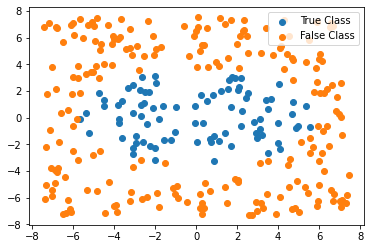

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train[y_train,0], X_train[y_train,1], label = 'True Class')
plt.scatter(X_train[~y_train,0], X_train[~y_train,1], label = 'False Class')
plt.legend()
plt.show()

## Answer:

# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:
Joint Probability Distribution:

P(A,B,C,D,E)=(A)P(B|A)P(D|B)P(E|B)P(C|A,E)P(F|C,E,D)

# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


## Answer: